In [3]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude
error = []

for keep in range(1, 101):
    thresh = Btsort[int(np.floor((1-keep/100)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    error.append(((B - Alow)**2).mean())

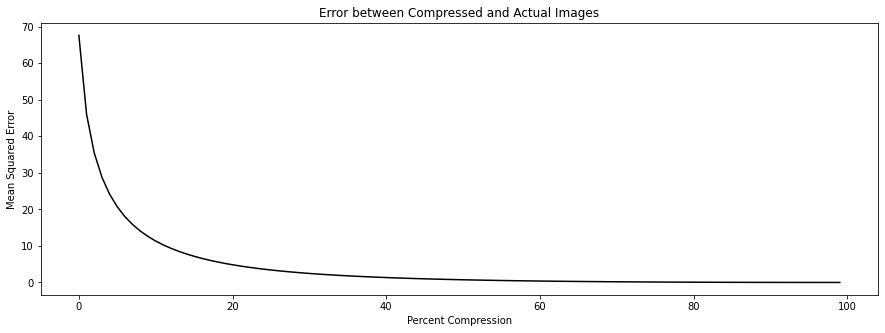

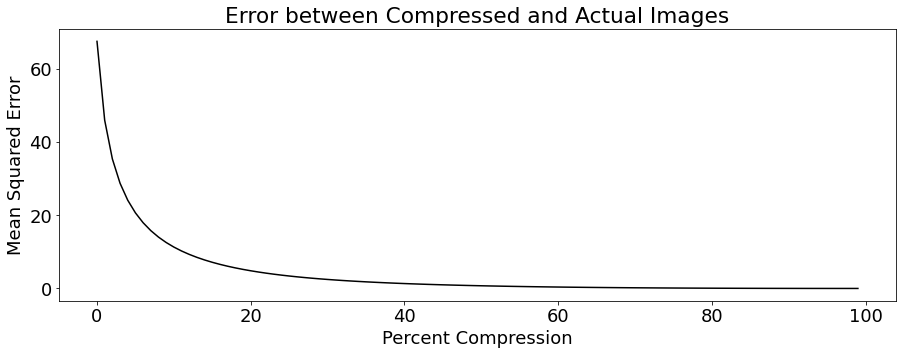

In [4]:
plt.figure(figsize=(15,5))
plt.plot(error, color='black')
plt.xlabel('Percent Compression')
plt.ylabel('Mean Squared Error')
plt.title('Error between Compressed and Actual Images');